# Lab 3

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Z-score](#z)
      1. [Read test results](#test_res)
      2. [Create test_df](#test_df)
      3. [DataFrame shape](#shape)
      4. [Null values](#null)
      5. [Age values](#age)
      6. [Cabin values](#cabin)
2. [Selection](#selection)
3. [Train Logistic Regression](#train)
4. [K-Fold cross_val_score](#k_fold)
5. [K-Fold cross_validate](#k_fold_val)
6. [Naive Bayes](#bayes)
7. [Support Vector Machine](#svm)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [1]:
import numpy as np
import pandas as pd

# 1. [Z-score](#chapters) <a class="anchor" id="z"></a>

## 1.1 [Read test results](#chapters) <a class="anchor" id="test_res"></a>

In [2]:
df = pd.read_csv('../datasets/eng_test.csv', sep=';')
df.head(5)

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


## 1.2

<Axes: >

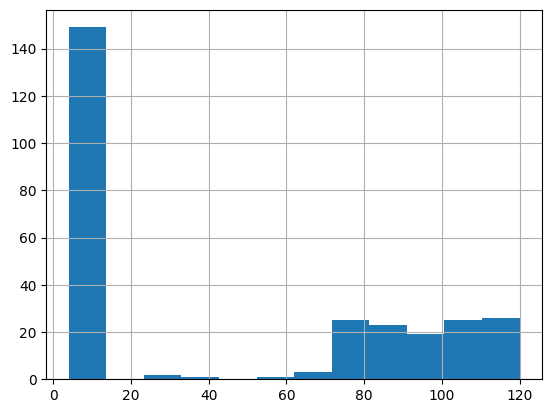

In [3]:
df.Score.hist(bins=12)

## 1.3

            Score
count  125.000000
mean    93.776000
std     17.903804
min     25.000000
25%     81.000000
50%     94.000000
75%    107.000000
max    120.000000


<Axes: >

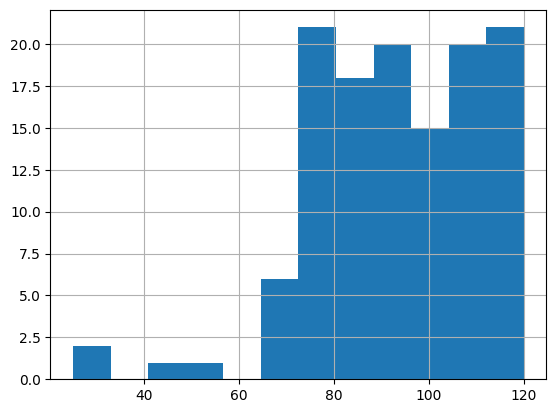

In [4]:
toefl_df = df[df['Exam'] == 'TOEFL']
print(toefl_df.describe())
toefl_df.Score.hist(bins=12)

## 1.4

            Score
count  149.000000
mean     6.432886
std      1.571126
min      4.000000
25%      5.000000
50%      6.500000
75%      8.000000
max      9.000000


<Axes: >

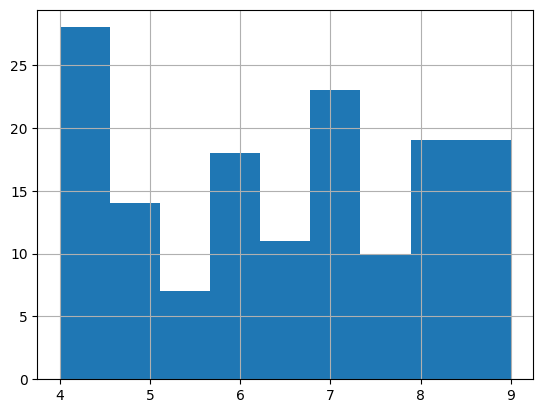

In [8]:
ielts_df = df[df['Exam'] == 'IELTS']
print(ielts_df.describe())
ielts_df.Score.hist(bins=9)

## 1.5

In [12]:
z_score = ((toefl_df.iloc[0].Score - toefl_df.Score.mean()) / toefl_df.Score.std())
print(f"Mean = {toefl_df.Score.mean()}, std = {toefl_df.Score.std()},\
 z_score = {z_score}")

Mean = 93.776, std = 17.90380388488399, z_score = -0.9370075827385381


## 1.6

In [14]:
toefl = (toefl_df.Score - toefl_df.Score.mean()) / toefl_df.Score.std()
ielts = (ielts_df.Score - ielts_df.Score.mean()) / ielts_df.Score.std()

res = pd.DataFrame(pd.concat([toefl, ielts]))
df['z_score'] = res
df.sample(10)

,Id,Exam,Score,Advanced,z_score
190,ID270,IELTS,8.0,YES,0.997446
182,ID263,IELTS,5.0,NO,-0.912012
231,ID60,TOEFL,87.0,YES,-0.378467
53,ID147,IELTS,9.0,NO,1.633932
56,ID15,TOEFL,106.0,NO,0.682760
129,ID215,IELTS,8.0,YES,0.997446
50,ID144,IELTS,4.5,YES,-1.230255
189,ID27,TOEFL,81.0,NO,-0.713591
229,ID59,TOEFL,97.0,YES,0.180073
73,ID165,IELTS,5.0,NO,-0.912012


# 2. Anomaly

In [18]:
bikes = pd.read_pickle('../datasets/BikesDataVars.pkl')
bikes.sample(10)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
2913,2018-04-01,9,13.5,66,1.8,0.0,0.0,Spring,0,True,933,0,Chilly,0
4961,2018-06-25,17,31.5,42,2.3,0.0,0.0,Summer,0,True,777,1,Hot,0
8301,2018-11-11,21,8.0,51,0.5,0.0,0.0,Autumn,0,True,396,1,Chilly,0
5530,2018-07-19,10,29.4,56,2.2,0.0,0.0,Summer,0,True,274,1,Hot,0
3997,2018-05-16,13,21.8,97,2.4,35.0,0.0,Spring,0,True,120,0,Nice,0
7325,2018-10-02,5,10.8,82,0.3,0.0,0.0,Autumn,0,False,0,0,Chilly,0
6028,2018-08-09,4,28.1,81,1.5,0.0,0.0,Summer,0,True,157,0,Hot,0
4267,2018-05-27,19,21.7,38,2.1,0.0,0.0,Spring,0,True,3035,0,Nice,0
5627,2018-07-23,11,32.7,48,2.2,0.0,0.0,Summer,0,True,481,1,Hot,0
656,2017-12-28,8,-4.7,30,0.6,0.0,0.0,Winter,0,True,493,0,Freezing,0


## 2.1

In [29]:
q1, q3 = bikes['Rental Count'].quantile([0.25, 0.75])
iqr = q3 - q1
print(f"Interquantile range for 'Rental Count' is {iqr}")

Interquantile range for 'Rental Count' is 852.0


## 2.2

In [30]:
print(q1 - 1.5 * iqr, q3 + 1.5 * iqr)

-1121.0 2287.0


# 2.3